In [1]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.    0. ]
 [405.5   0. ]
 [  0.  288.5]
 [405.5 288.5]]
[[ 6.11584185e-01 -1.56772284e-01  1.15494658e+01]
 [ 2.26751420e-01  9.26033771e-01 -1.71882333e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


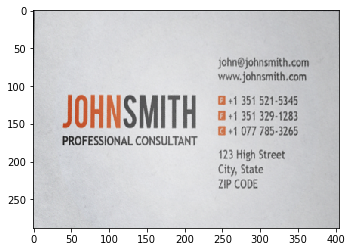

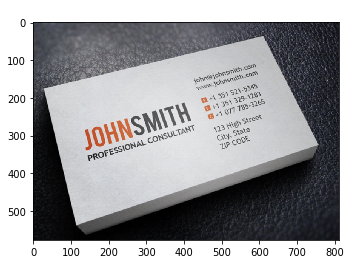

In [27]:
img = cv2.imread("./data/namecard.png")
height, width = img.shape[:2]


#좌표순서
point_list = [[27,179], [611,36], [118,534], [754,325]]

pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])
                  ])
print(pts1)# 꼭지점 4개

#pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
pts2 = np.float32([ [0,0],[width/2,0],[0,height/2],[width/2,height/2] ])
print(pts2) # 0,0 -> 0,x -> y,0 -> x,y 순

M = cv2.getPerspectiveTransform(pts1,pts2) # 이미지, 회전각도, 확대배율
print(M)

#rotate_img = cv2.warpPerspective(img, M , (width,height) ) #
rotate_img = cv2.warpPerspective(img, M , (int(width/2),int(height/2)) ) #
                           
#print(rotate_img.shape) 
imshow('',rotate_img)

imshow(" ", img)

###  다른 이미지 찾아보기

168 300


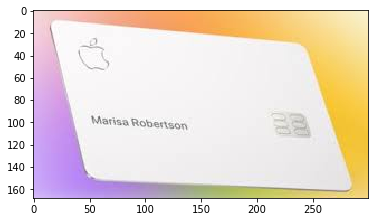

[[  0.   0.]
 [300.   0.]
 [  0. 168.]
 [300. 168.]]


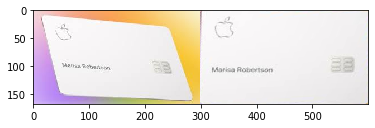

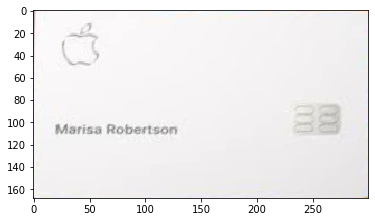

In [248]:
#이미지 호출 
img = cv2.imread("./data/credit_card3.jpg")
height, width = img.shape[:2]
print(height, width)


#그늘은 노이즈라 생각하면 된다.먼저 그레이로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#######좌표 4개 찾기

#잡음제거 ,어느 값 이하는 다 0으로 떨어지게 하고ㅇㅋ?
_,binary = cv2.threshold(gray, 222, 255 , cv2.THRESH_BINARY )
#binary = 255 -binary
#imshow('',binary)


#팽창후 침식, 비어있는 구멍 채운 후 원래사이즈로 복귀 , 구멍메꾸기
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), 
                          iterations = 3 )
#imshow('',closed)


#변조방지
copy_img = closed.copy()

#바운더리(꼭지점?) 찾기
#findContours 함수는 원본이미지를 변경시키기 때문에 copy를 미리 사용한다.
contours, _ = cv2.findContours(copy_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# #print(contours)
max_area = 0
for con in contours:
    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con, 0.1*peri, True)
    area = cv2.contourArea(con) # 컨투어의 영역(면적)을 계산, 실수값으로 나옴
    #print(f"shape={len(con)}  length={peri} approx={len(approx)} area={area}")
    if len(approx) == 4 and max_area < area:
        max_area = area
        boundary = approx
        
#cv2.drawContours(img, [boundary], -1, (255, 255, 0), 5) #두번째 배열처럼 넣어줘야함
imshow('',np.hstack([img]))


boundary_list = []
for i in range(4):
    boundary_list.append(list(boundary[i][0]))

    
    
#꼭지점
#print(boundary_list)
#만들기
pts1 = np.float32([boundary_list[0],
                  boundary_list[3],
                  boundary_list[1],
                  boundary_list[2]
                  ])
#print(pts1)# 꼭지점 4개

#pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
pts2 = np.float32([ [0,0],[width,0],[0,height],[width,height] ])
print(pts2) # 0,0 -> 0,x -> y,0 -> x,y 순

M = cv2.getPerspectiveTransform(pts1,pts2) # 이미지, 회전각도, 확대배율
#print(M)

#rotate_img = cv2.warpPerspective(img, M , (width,height) ) #
rotate_img = cv2.warpPerspective(img, M , (int(width),int(height)) ) #
                           
#print(rotate_img.shape) 
imshow('',np.hstack([img, rotate_img  ]))

imshow('',np.hstack([rotate_img]))